### 统计学：检验心理学现象

在下方单元格中回答问题并执行相关代码，你可以 [参考项目指导](https://github.com/udacity/new-dand-advanced-china/blob/master/%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1/%E7%BB%9F%E8%AE%A1%E5%AD%A6%EF%BC%9A%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1.md) 并在正式提交前查看 [项目要求](https://review.udacity.com/#!/rubrics/305/view)。提交时请将 Jupyter notebook 导出成 HTML 或者 PDF 进行提交（File -> Download As）。

背景信息

在一个Stroop （斯特鲁普）任务中，参与者得到了一列文字，每个文字都用一种油墨颜色展示。参与者的任务是将文字的打印颜色大声说出来。这项任务有两个条件：一致文字条件，和不一致文字条件。在一致文字条件中，显示的文字是与它们的打印颜色匹配的颜色词，如“红色”、“蓝色”。在不一致文字条件中，显示的文字是与它们的打印颜色不匹配的颜色词，如“紫色”、“橙色”。在每个情况中，我们将计量说出同等大小的列表中的墨色名称的时间。每位参与者必须全部完成并记录每种条件下使用的时间。

调查问题

作为一般说明，请确保记录你在创建项目时使用或参考的任何资源。作为项目提交的一部分，你将需要报告信息来源。

(1) 我们的自变量是什么？因变量是什么？

自变量：文字与文字的油墨颜色是否一致。

因变量：说出同等大小的列表中的文字的墨色名称的时间。

(2) 此任务的适当假设集是什么？你需要以文字和数学符号方式对假设集中的零假设和对立假设加以说明，并对数学符号进行定义。你想执行什么类型的统计检验？为你的选择提供正当理由（比如，为何该实验满足你所选统计检验的前置条件）。

文字与文字的油墨颜色一致时，总体读出文字的油墨颜色的平均时间：μ0

文字与文字的油墨颜色不一致时，总体读出文字的油墨颜色的平均时间：μ1

假设集：

原假设H0：μ0 - μ1 = 0 读出文字与文字的油墨颜色一致时与不一致时的时间不存在差异。

对立假设H1： μ0 - μ1 ≠ 0 读出文字与文字的油墨颜色一致时与不一致时的时间存在差异。

统计检验的方法：相依样本t检验

原因：
    
    1.相同的参与者分别进行两次试验，然后对两组数据（时间）的差别进行比较，而不是从总体中抽取一部分样本进行对比。
    2.样本总量较小，30<。
    3.实验的自变量有两种（分别是文字与墨色一致，文字与墨色不一致），且实验结果分别对应一组因变量（读出颜色所用时间）。
    4.总体的均值方差未知。
    
前置条件：
    检验的样本按是否一致进行分类，具有具体数据，样本的方差和均值可以求出。

现在轮到你自行尝试 Stroop 任务了。前往此链接，其中包含一个基于 Java 的小程序，专门用于执行 Stroop 任务。记录你收到的任务时间（你无需将时间提交到网站）。现在下载此数据集，其中包含一些任务参与者的结果。数据集的每行包含一名参与者的表现，第一个数字代表他们的一致任务结果，第二个数字代表不一致任务结果。

(3) 报告关于此数据集的一些描述性统计。包含至少一个集中趋势测量和至少一个变异测量。

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import * 
%matplotlib inline

df = pd.read_csv('stroopdata.csv')

In [2]:
df['Num'] = df.index+1
df = df[['Num','Congruent','Incongruent']]
df

,Num,Congruent,Incongruent
0,1,12.079,19.278
1,2,16.791,18.741
2,3,9.564,21.214
3,4,8.630,15.687
4,5,14.669,22.803
5,6,12.238,20.878
6,7,14.692,24.572
7,8,8.987,17.394
8,9,9.401,20.762
9,10,14.480,26.282


In [3]:
#平均值
c_mean = df['Congruent'].mean()
i_mean = df['Incongruent'].mean()
c_std = df['Congruent'].std()
i_std = df['Incongruent'].std()

(c_mean , i_mean, c_std, i_std )

(14.051124999999999, 22.015916666666666, 3.5593579576451955, 4.797057122469138)

(4) 提供显示样本数据分布的一个或两个可视化。用一两句话说明你从图中观察到的结果。

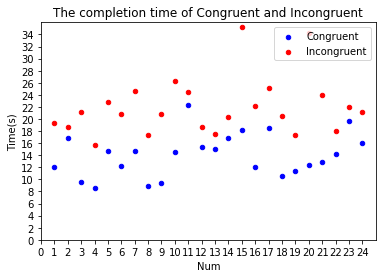

In [4]:
x = df['Num']
yc = df['Congruent']
yi = df['Incongruent']

plt.scatter(x,yc,s=20,c='b')
plt.scatter(x,yi,s=20,c='r')
plt.xlabel('Num')
plt.ylabel('Time(s)')
plt.legend(loc='upper right')
plt.xlim([0,25])
plt.ylim([0,36])
plt.xticks(np.arange(0, 25, 1.0))
plt.yticks(np.arange(0, 35, 2))
plt.title('The completion time of Congruent and Incongruent');

从图上可以看出：文字与墨色不一致的用时普遍高于一致

(5) 现在，执行统计测试并报告你的结果。你的置信水平和关键统计值是多少？你是否成功拒绝零假设？对试验任务得出一个结论。结果是否与你的期望一致？

In [5]:
#样本数量
n = len(df)

#自由度
n - 1

23

样本数量为24，自由度为23。

In [6]:
#两次试验的用时差异，及差异的均值
Diff = df['Incongruent'] - df['Congruent']
df['Diff'] = Diff
di_mean = Diff.mean()
di_mean

7.964791666666666

两次试验的用时差异的均值为7.96s。

In [7]:
#平均差异，及平方
dfm = df['Diff'] - di_mean
df['Squ_di'] = dfm*dfm

#求平方的和
sum_Squdi = df['Squ_di'].sum() 

In [8]:
#样本标准偏差
var = sum_Squdi/(n-1)
sq = sqrt(var)
sq

4.864826910359056

样本的标准偏差为4.86.

In [9]:
ts = di_mean/(sq/sqrt(n))
ts

8.020706944109957

ts = 8.02

取显著水平 α=0.05

查表 tc = +2.069 或 tc = -2.069

ts>tc(2.069)，ts不在tc（-2.069，+2.069）的区间之内，所以 p<0.05

所以我们拒绝原假设：读出文字与文字的油墨颜色一致时与不一致时的时间不存在差异。

这一结果与我估计的相同，因为我在做试验时确实感觉到第二次读出颜色花了更长的时间。

In [10]:
cohen_d = di_mean/ sq 
cohen_d

1.6372199491222623

cohen_d = 1.64

In [11]:
# 置信区间 [M+tc*(Sd/√n), M+tc*(Sd/√n)]
C1 = di_mean+2.069*(sq/sqrt(n))
C2 = di_mean-2.069*(sq/sqrt(n))
(C2, C1)

(5.910215421310279, 10.019367912023053)

根据公式得出置信区间为 (5.91, 10.02)，
可以说文字与文字的油墨颜色不一致时比一致时读取时间大概要多花5.91到10.02秒。
因为假设的ɑ水平为0.05，进行的是双尾假设检验，且ts落在tc范围外，因此P值小于0.05。